In [1]:
import numpy as np
import pandas as pd
import datetime
import nltk; nltk.download('popular')
from collections import defaultdict
import matplotlib.pyplot as plt
plt.close('all')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/dan/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

In [2]:
dem_df = pd.read_csv("../Democrats/data/dem_data/dem_status_data_former.csv")
rep_df = pd.read_csv("../Republicans/data/rep_data/rep_status_data_former.csv")

In [3]:
dem_df

,user_name,status,datetime
0,Sen. Maggie Hassan,On the anniversary of the Pulse shooting we sh...,2020-06-12 18:18:08.419898
1,Jeanne Shaheen,The Portsmouth Naval Shipyard was founded 220 ...,2020-06-12 18:21:53.899517
2,Ed Markey,Trans rights are human rights and Donald Trump...,2020-06-12 18:52:04.348422
3,Tammy Duckworth,"For over a century, when our nation has asked ...",2020-06-12 18:54:17.823207
4,Kyrsten Sinema,Arizonans: @AZStateBar offers a hotline for le...,2020-06-12 19:00:06.251557
...,...,...,...
1208,Senator Jon Tester,#PrideMonth is a time to celebrate the immense...,2020-06-22 14:41:20.066319
1209,Senator Dick Durbin,With Pres. Trump still threatening to end #DAC...,2020-06-22 14:48:04.706028
1210,Senator Bob Casey,Last week’s #SCOTUS ruling rejecting President...,2020-06-22 14:48:36.696094
1211,Elizabeth Warren,"After Hurricane Maria devastated Puerto Rico, ...",2020-06-22 15:02:46.738707


In [4]:
rep_df

,user_name,status,datetime
0,Ted Cruz,Pelosi calls for removing racist Democrats fro...,2020-06-12 18:15:28.971144
1,Marco Rubio,Today we sent a bipartisan list of questions t...,2020-06-12 18:37:02.087157
2,Sen. Marsha Blackburn,Chinese sweatshops and Communist blood money a...,2020-06-12 18:37:17.812156
3,Marco Rubio,Just FYI this headline is 100% false &amp; art...,2020-06-12 19:05:33.737982
4,Cindy Hyde-Smith,Today we honor the millions of women who have ...,2020-06-12 19:15:05.426970
...,...,...,...
957,ChuckGrassley,Q&amp;A w Council Bluffs Area Chamber of Comme...,2020-06-22 14:54:19.441036
958,Joni Ernst,Congrats to the 19th Chief Master Sergeant of ...,2020-06-22 14:54:32.174205
959,Thom Tillis,"Thanks to our Small Business Advisory Council,...",2020-06-22 15:01:04.687951
960,Cory Gardner,More than 70% of land in Mesa County is owned ...,2020-06-22 15:02:48.873367


In [5]:
#Democrate day and hour tweet dataframe. key = day value = hour.

dem_date_list = {}

for j in range(len(dem_df['datetime'])):
    day = datetime.datetime.strptime(dem_df['datetime'].iloc[j], "%Y-%m-%d %H:%M:%S.%f").day
    dem_date_list[day] = []
    

for i in range(len(dem_df['datetime'])):
    day = datetime.datetime.strptime(dem_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").day
    hour = datetime.datetime.strptime(dem_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").hour
    dem_date_list[day] = dem_date_list.get(day) + [hour]
#     print(datetime.datetime.strptime(dem_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").hour)
for key, value in dem_date_list.items():
    print(key, value)
    print("\n")

12 [18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22]


13 [8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 22, 22]


14 [7, 7, 7, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 21, 21, 21]


15 [7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 

In [6]:
#Republican day and hour tweet dataframe. key = day 
#                                         value = array of the hours each tweet was tweeted.

rep_date_list = {}

for j in range(len(rep_df['datetime'])):
    day = datetime.datetime.strptime(rep_df['datetime'].iloc[j], "%Y-%m-%d %H:%M:%S.%f").day
    rep_date_list[day] = []
    

for i in range(len(rep_df['datetime'])):
    day = datetime.datetime.strptime(rep_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").day
    hour = datetime.datetime.strptime(rep_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").hour
    rep_date_list[day] = rep_date_list.get(day) + [hour]
#     print(datetime.datetime.strptime(dem_df['datetime'].iloc[i], "%Y-%m-%d %H:%M:%S.%f").hour)
for key, value in rep_date_list.items():
    print(key, value)
    print("\n")
    


12 [18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21]


13 [0, 0, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 17, 18, 19, 19]


14 [5, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 21, 21, 23, 23]


15 [0, 0, 0, 0, 0, 0, 6, 6, 7, 7, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 20, 20, 20, 20, 21, 21]


16 [5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [13]:
#find out the number of tweets per hour for one day.

hour_range = range(0, 24)

rep_temp = set(rep_date_list.get(17))
dem_temp = set(dem_date_list.get(17))

rep_tweet_count = []
dem_tweet_count = []

for num in hour_range:
    if num not in rep_temp:
        rep_tweet_count.append(0)
    else:
        rep_tweet_count.append(rep_date_list.get(18).count(num))

    if num not in dem_temp:
        dem_tweet_count.append(0)
    else:
        dem_tweet_count.append(dem_date_list.get(18).count(num))


print([x for x in hour_range], len([x for x in hour_range]))
print(rep_tweet_count, len(rep_tweet_count))
print(dem_tweet_count, len(dem_tweet_count))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] 24
[0, 0, 0, 0, 0, 1, 2, 3, 6, 13, 15, 7, 16, 9, 10, 18, 11, 14, 8, 6, 1, 0, 0, 1] 24
[0, 0, 0, 0, 0, 0, 0, 0, 3, 20, 29, 20, 16, 22, 14, 12, 11, 18, 13, 10, 6, 4, 0, 0] 24


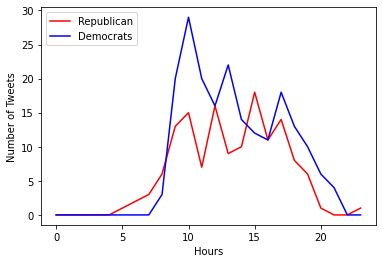

In [14]:
#plot the stuff

plt.plot(hour_range, rep_tweet_count, label="Republican", color="r")
plt.plot(hour_range, dem_tweet_count, label="Democrats", color="b")
plt.legend(loc="upper left")
plt.xlabel("Hours")
plt.ylabel("Number of Tweets")
plt.show()